In [1]:
from src.environment import Environment, episode
from src.agent import Agent
from collections import deque
from IPython.display import clear_output
import numpy as np
import torch
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("error")

%matplotlib inline

In [2]:
env = Environment(no_graphics=True)
agent = Agent(s_dim=env.state_size, a_dim=env.action_size)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
def train(env, agent, n_episodes=1000):
    scores_rolling = deque(maxlen=100)
    scores = []
    avg_scores = []
    steps = []
    for n in range(1, n_episodes + 1):
        score = episode(env, agent)

        scores_rolling.append(score)
        scores.append(score)
        avg = np.mean(scores_rolling)
        avg_scores.append(avg)
        steps.append(n)

        torch.save(agent.actor_local.state_dict(), 'model.pth')

        clear_output(wait=True)
        print(f'episode {n}/{n_episodes}. Average score over past 100: {avg}')

        if avg >= 30.0:
            break
    
    return steps, scores, avg_scores

episode 297/5000. Average score over past 100: 30.116199326850474


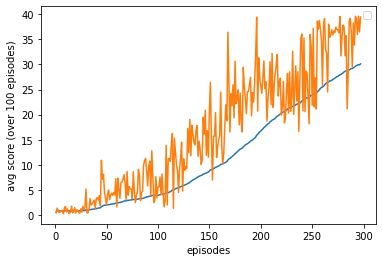

In [4]:
n_episodes = 1000

steps, scores, avg_scores = train(env, agent, n_episodes=n_episodes)
plt.plot(steps, avg_scores, label="avg/100 episodes")
plt.plot(steps, scores, label="scores")

plt.legend()
plt.xlabel("episodes")
plt.ylabel("avg score (over 100 episodes)")
plt.show()

In [5]:
env.close()